In [1]:
import networkx as nx
import numpy as np
from helper_functions import *


[(1, 3), (3, 4), (3, 5), (3, 1), (3, 2), (2, 3), (4, 5), (4, 3), (5, 6), (5, 7), (5, 4), (5, 3), (6, 5), (7, 5)]
[[1. 1. 0. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]] [[1. 1. 0. 0.]
 [0. 0. 1. 1.]] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 2, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14] [1, 1]
[(1, 3), (3, 5), (5, 6)]
[(1, 3), (3, 4), (4, 5), (5, 6)]
[(3, 5), (2, 3), (5, 7)]
[(3, 4), (2, 3), (4, 5), (5, 7)]


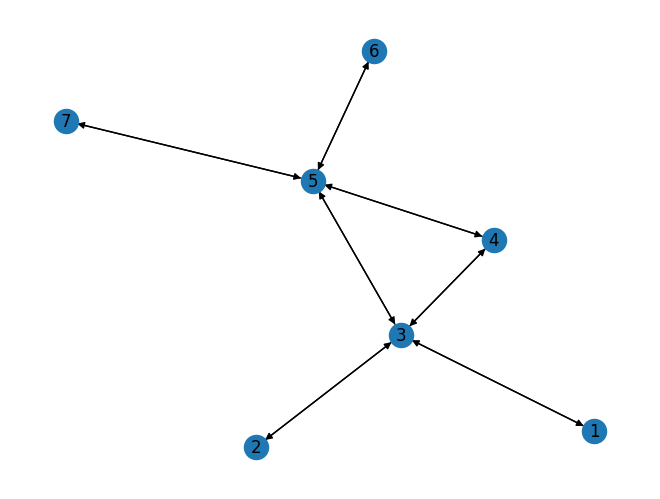

In [2]:

G = nx.DiGraph()
G.add_edges_from([(1,3),(2,3),(3,4),(4,5),(3,5),(5,6),(5,7),(3,1),(3,2),(4,3),(5,4),(5,3),(6,5),(7,5)])

print(G.edges())
#nx.set_edge_attributes(G, {e: 1 for e in G.edges()}, name = 'c')
nx.set_edge_attributes(G, {e: (i+1) for i,  e in enumerate(G.edges())}, name = 'c')
nx.set_edge_attributes(G, {(3,5):1}, name = 'c')
nx.set_edge_attributes(G, {e: 1 for e in G.edges()}, name = 't')
x = list(G.edges)

nx.draw(G,with_labels=True)

ZK = [(1,6,1),(2,7,1)] # z,k,a

Q,B,t,c,a = sestavi_QBtca(ZK, G)
print(Q,B,t,c,a)

for i in range(Q.shape[1]):
    print(binary_vector_to_edges(Q[:,i],G.edges()))

        


In [3]:
#c = [1, 3, 1, 1, 3, 1, 3]
#t = [1, 1, 1, 1, 0.5, 1, 1]
#Q = [[1, 1, 0, 0], [0, 0, 1, 1], [1, 0, 1, 0], [1, 0, 1, 0], [0, 1, 0, 1], [1, 1, 0, 0], [0, 0, 1, 1]]
#B = [[1, 1, 0, 0], [0, 0, 1, 1]]


paths = poklici_linprog(ZK,G)


[1. 0. 0. 1.] Optimization terminated successfully. (HiGHS Status 7: Optimal)


[1. 0. 0. 1.] Optimization terminated successfully. (HiGHS Status 7: Optimal)


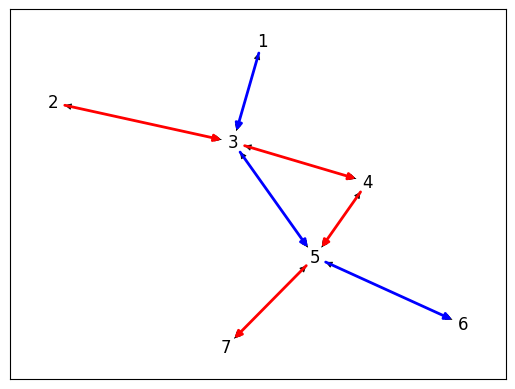

In [4]:
paths = poklici_linprog(ZK,G,edges_mode=True)
my_nx_draw(G,paths,with_labels=True,with_nodes=False)

In [21]:
# import networkx as nx
# import osmnx as ox

# ox.config(use_cache=True, log_console=True)

# # download street network data from OSM and construct a MultiDiGraph model
# G = ox.graph_from_point((37.79, -122.41), dist=100, network_type="drive")

# # impute edge (driving) speeds and calculate edge traversal times
# G = ox.add_edge_speeds(G)
# G = ox.add_edge_travel_times(G)

# # you can convert MultiDiGraph to/from geopandas GeoDataFrames
# gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
# G = ox.graph_from_gdfs(gdf_nodes, gdf_edges, graph_attrs=G.graph)

# # convert MultiDiGraph to DiGraph to use nx.betweenness_centrality function
# # choose between parallel edges by minimizing travel_time attribute value
# D = ox.utils_graph.get_digraph(G, weight="travel_time")

# # calculate node betweenness centrality, weighted by travel time
# bc = nx.betweenness_centrality(D, weight="travel_time", normalized=True)
# nx.set_node_attributes(G, values=bc, name="bc")

# # plot the graph, coloring nodes by betweenness centrality
# nc = ox.plot.get_node_colors_by_attr(G, "bc", cmap="plasma")
# fig, ax = ox.plot_graph(
#     G, bgcolor="k", node_color=nc, node_size=50, edge_linewidth=2, edge_color="#333333"
# )

# # save graph to shapefile, geopackage, or graphml
# ox.save_graph_shapefile(G, filepath="./graph_shapefile/")
# ox.save_graph_geopackage(G, filepath="./graph.gpkg")
# ox.save_graphml(G, filepath="./graph.graphml")

<class 'networkx.classes.multidigraph.MultiDiGraph'>


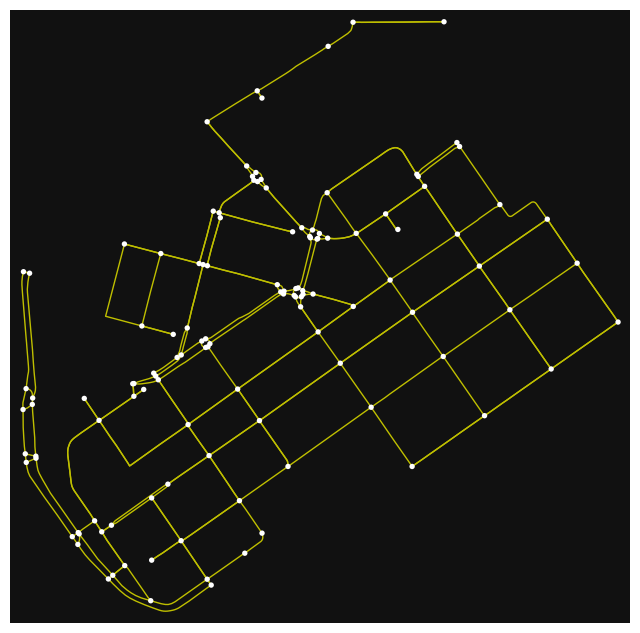

                  y          x  street_count highway  \
osmid                                                  
25216594  60.164794  24.921057             4     NaN   
25238874  60.163665  24.921028             4     NaN   
25238944  60.164631  24.921286             3     NaN   
25291537  60.164325  24.937023             4     NaN   
25291564  60.165948  24.941674             4     NaN   

                           geometry  
osmid                                
25216594  POINT (24.92106 60.16479)  
25238874  POINT (24.92103 60.16366)  
25238944  POINT (24.92129 60.16463)  
25291537  POINT (24.93702 60.16433)  
25291564  POINT (24.94167 60.16595)  
                                                                     osmid  \
u        v          key                                                      
25216594 1372425714 0                                             23856784   
25238874 1372425713 0                                 [29977177, 30470347]   
25238944 25216594   0        

<AxesSubplot: >

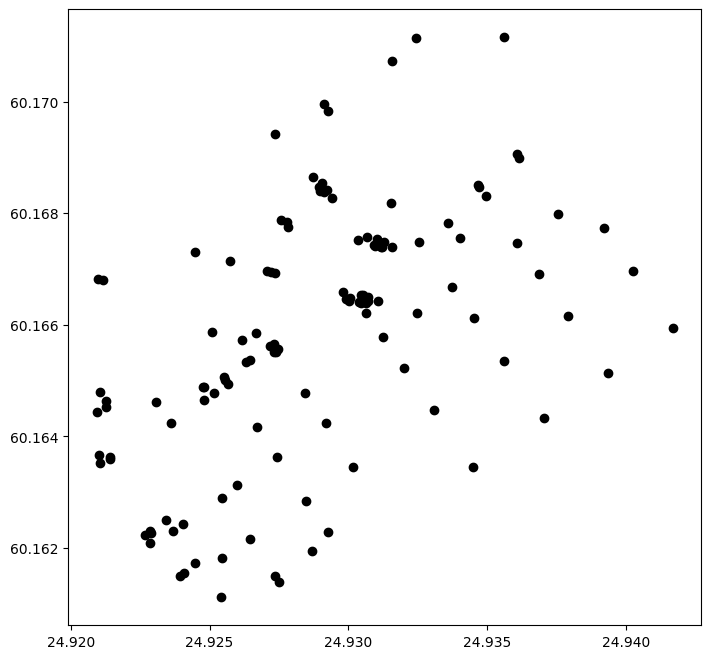

In [3]:
import osmnx as ox
import matplotlib.pyplot as plt

place = 'Kamppi, Helsinki, Finland'
graph = ox.graph_from_place(place,network_type='drive')
# graph = ox.graph_from_point((37.79, -122.41), dist=750, network_type="drive")
print(type(graph))
# Plot the streets
fig, ax = ox.plot_graph(graph,edge_color='y')

# Retrieve nodes and edges
#G = ox.add_edge_travel_times(G)
nodes, edges = ox.graph_to_gdfs(graph)
print(nodes.head())
print(edges.head())

# Plot the nodes
fig, ax = plt.subplots(figsize=(12,8))
nodes.plot(ax=ax, facecolor='black')

#edges.where(edges["max_speed"] is not np.nan)

In [12]:
# recimo, da nastavimo c na stevilo pasov, t pa na dolzino odseka
g = nx.DiGraph(graph)

#nx.set_edge_attributes(g, {e: g.edges()[e]["lanes"] for e in g.edges()}, name = 'c')
for e in g.edges():
    print(e)
nx.set_edge_attributes(g, {e: 2 for e in g.edges()}, name = 'c')
# for e in g.edges():
#     try:
#         print(g.edges()[e]["lanes"])
#     except:
#         print(g.edges()[e])
nx.set_edge_attributes(g, {e: g.edges()[e]["length"] for e in g.edges()}, name = 't')
# plt.hist([l[i][2]["highway"] for i in range(len(l))])
# set([l[i][2]["highway"] for i in range(len(l))])
# LIST_OF_ROAD_TYPES = ['motorway','trunk','primary','primary_link','secondary','tertiary','unclassified','living_street','residential']


(25216594, 1372425714)
(25238874, 1372425713)
(25238944, 25216594)
(25238944, 319896278)
(25291537, 25291591)
(25291537, 25291565)
(25291537, 25292473)
(25291564, 25291565)
(25291564, 1377211669)
(25291565, 1377211666)
(25291565, 25291564)
(25291565, 25291537)
(25291591, 60170471)
(25291591, 1377610493)
(25292473, 25291537)
(25416262, 60069401)
(25416263, 1371748760)
(25416263, 282731082)
(25416267, 25416262)
(56113314, 979855850)
(56113314, 846597954)
(56115897, 60278325)
(56115897, 60072524)
(56115897, 295322365)
(56116937, 1372376956)
(56116937, 1372376935)
(56116937, 60004721)
(56116937, 1372425724)
(57743854, 60070287)
(60004721, 1372376937)
(60004721, 1372318837)
(60004721, 268177652)
(60004721, 56116937)
(60069401, 25416262)
(60070287, 1372441203)
(60070287, 57743854)
(60072524, 56115897)
(60072524, 267117319)
(60072524, 3177642345)
(60170470, 1377211668)
(60170470, 1377211669)
(60170471, 1377211668)
(60170471, 1372441170)
(60170471, 1377211667)
(60278325, 56115897)
(60278325, 1

In [9]:
l[0]

(25216594,
 1372425714,
 {'osmid': 23856784,
  'oneway': True,
  'lanes': '2',
  'name': 'Mechelininkatu',
  'highway': 'primary',
  'maxspeed': '40',
  'reversed': False,
  'length': 40.885,
  'geometry': <LINESTRING (24.921 60.165, 24.921 60.165, 24.921 60.165, 24.921 60.165, 24....>})

In [25]:

# 0:
# 25291537
# 1:
# 25291565
# for e in g.edges():
#     if g.edges[e]["oneway"] == False:
#         pass
# ta je oneway = False in istocasno je podvojen tko da ne rabm podvajat
#print((25291537,25291565) in g.edges())
#(25291565,25291537) in g.edges()

In [26]:
#list(g.nodes())

In [13]:
ZK = [(25216594,3177642345,1),(2037356632,25238874,1),(56115897, 56113314, 1)]
paths = poklici_linprog(ZK,g)
paths

[0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.] Optimization terminated successfully. (HiGHS Status 7: Optimal)


[[25216594,
  1372425714,
  25238874,
  1372425713,
  529507771,
  258188404,
  1372318829,
  159619609,
  175832743,
  1372425705,
  103062861,
  1372376935,
  149030036,
  149030035,
  1008183915,
  1861896796,
  1372376963,
  295322365,
  56115897,
  60072524,
  3177642345],
 [2037356632,
  1547012339,
  1372441189,
  1372441183,
  1372376956,
  56116937,
  1372376935,
  103062861,
  529507770,
  568147264,
  313937382,
  25238874],
 [56115897,
  60072524,
  267117319,
  724233143,
  724233128,
  267117317,
  846597945,
  846597947,
  2037356632,
  56113314]]

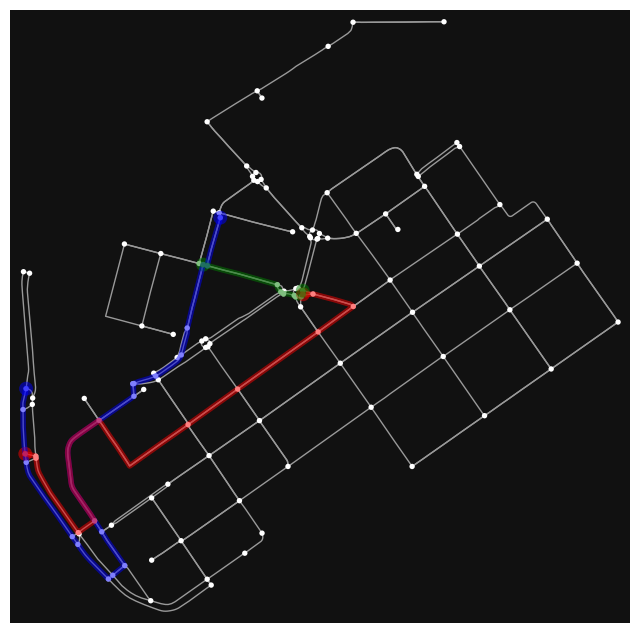

In [14]:
fig, ax = ox.plot_graph_routes(graph,paths,route_colors=list(COLORS)[:len(paths)])